# 2018-04-23 - Debut du stage
## Test de MotionClouds
D'après les examples de http://motionclouds.invibe.net/archive.html
### MotionClouds - Test de stimulus dynamique
Ne fonctionne pas, même avec Pyglet, PyOpenGL et VisPy.

In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt
#!rm -fr ../files/speed*

import MotionClouds as mc
name = 'speed'
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
help(mc.envelope_speed)

for V_X in [-1.0, -0.5, 0.0, 0.1, 0.5, 1.0, 4.0]:
    name_ = name + '-V_X-' + str(V_X).replace('.', '_')
    z = mc.envelope_gabor(fx, fy, ft, V_X=V_X)
    mc.figures(z, name_)
    mc.in_show_video(name_)



Help on function envelope_speed in module MotionClouds:

envelope_speed(fx, fy, ft, V_X=1.0, V_Y=0.0, B_V=0.5)
    Returns the speed envelope:
    selects the plane corresponding to the speed ``(V_X, V_Y)`` with some bandwidth ``B_V``.
    
    * (V_X, V_Y) = (0,1) is downward and  (V_X, V_Y) = (1, 0) is rightward in the movie.
    * A speed of V_X=1 corresponds to an average displacement of 1/N_X per frame.
    To achieve one spatial period in one temporal period, you should scale by
    V_scale = N_X/float(N_frame)
    If N_X=N_Y=N_frame and V=1, then it is one spatial period in one temporal
    period. It can be seen along the diagonal in the fx-ft face of the MC cube.
    
    A special case is used when ``B_V=0``, where the ``fx-ft`` plane is used as
    the speed plane: in that case it is desirable to set ``(V_X, V_Y)`` to ``(0, 0)``
    to avoid aliasing problems.
    
    Run the 'test_speed' notebook to explore the speed parameters, see
    http://motionclouds.invibe.net/posts

""


Failed to generate the visualisation: abstract
Failed to generate the cube: abstract


KeyboardInterrupt: 

### MotionClouds - Test de stimulus statitique
D'après cet [exemple](http://motionclouds.invibe.net/posts/static-motion-clouds.html). Fonctionne correctement.

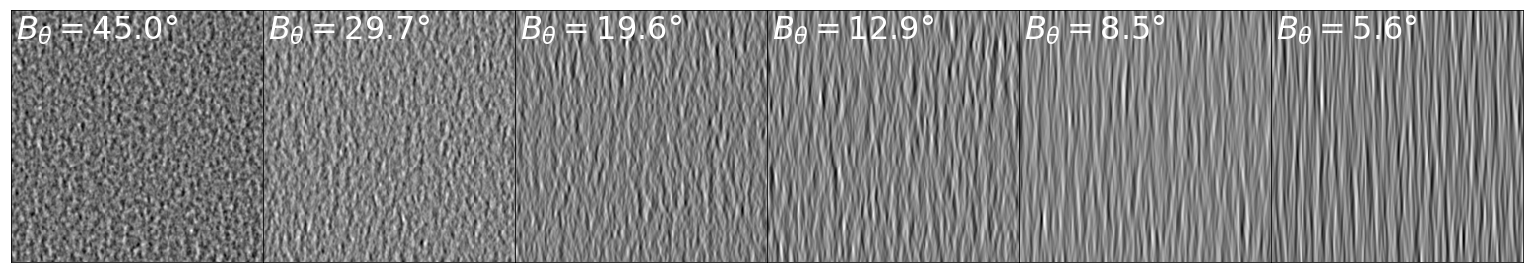

In [13]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)


N_theta = 6
bw_values = np.pi*np.logspace(-2, -5, N_theta, base=2)
fig_width = 21


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

#import os
#fig.savefig(os.path.join('../figs', 'orientation_tuning.png'))